# Rio de Janeiro's Airbnb in Carnival


Hello! I'm Stella, a brazillian woman who loves the city of Rio de Janeiro!

So, for my first Data Scientist Nanodegree project, I'd like to take a look at Rio de Janeiro's Airbnb dataset to answer some questions about this fabulous city and see if Airbnb is a viable alternative to book a room in Rio de Janeiro during Carnival.

During the months of February and March, the city of Rio de Janeiro hosts a popular festival called Carnival. A lot of people look for different websites to book a room, including the Aribnb website. Let's see if this site is a viable alternative to spend your days celebrating Carnival in Rio de Janeiro. 


# Business Understanding

Let's take a look at Rio de Janeiro's Airbnb datasets to answer the questions below:

1) How many neighborhoods were listed in Rio de Janeiro?

2) What was the most listed type of room in Rio de Janeiro? 

3) What was the 10 most listed neighbourhoods in Rio de Janeiro?

4) What was the the total listings during the Carnival holidays in 2021 in Rio de Janeiro? 

5) What was the average price to book a room during the period of the Carnival hollidays in Rio de Janeiro?

# Data Understanding

We will use two datasets from Airbnb. 

In the section below, we will gather the information reading two files: listings.csv and calendar.csv

The listings.csv file provides information about the name of the hosts, dates of the last reviews, neighbourhoods and types of rooms. 

In [3]:
# The first step is to import the necessary libraries and read the datasets

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Here, we are gathering the data 

df_calendar = pd.read_csv('./calendar.csv')
df_listings = pd.read_csv('./listings.csv')



In [4]:
#Whe can take a quick look in the listings dataset with head() 
#In this step we are assessing the data of the listings in Rio de Janeiro
df_listings.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,17878,"Very Nice 2Br in Copacabana w. balcony, fast WiFi",68997,Matthias,NaN,Copacabana,-22.96592,-43.17896,Entire home/apt,221,5,260,2021-02-08,2.01,1,304
1,24480,Nice and cozy near Ipanema Beach,99249,Goya,NaN,Ipanema,-22.98570,-43.20193,Entire home/apt,307,3,85,2018-02-14,0.67,1,10
2,25026,Beautiful Modern Decorated Studio in Copa,3746246,Ghizlane,NaN,Copacabana,-22.97712,-43.19045,Entire home/apt,160,7,238,2020-02-15,1.82,11,328
3,35636,Cosy flat close to Ipanema beach,153232,Patricia,NaN,Ipanema,-22.98816,-43.19359,Entire home/apt,273,2,181,2020-03-15,2.02,1,207
4,35764,COPACABANA SEA BREEZE - RIO - 20 X Superhost,153691,Patricia Miranda & Paulo,NaN,Copacabana,-22.98127,-43.19046,Entire home/apt,135,3,353,2021-02-10,2.79,1,101


In the calendar.csv file we can see the id of the listings, the prices, the minimum and maximum number of nights

In [5]:
df_calendar.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,45766287,2021-02-23,f,$150.00,$150.00,2.0,1125.0
1,45764740,2021-02-24,f,$100.00,$100.00,1.0,4.0
2,45764740,2021-02-25,t,$100.00,$100.00,1.0,4.0
3,45764740,2021-02-26,t,$100.00,$100.00,1.0,4.0
4,45764740,2021-02-27,t,$100.00,$100.00,1.0,4.0


# Preparing and Modeling Data


The code below provide the information abou how many different neighborhoods were listed in Rio de Janeiro.

1) How many neighborhoods were listed in Rio de Janeiro?

R: 7712 neighbourhoods

In [14]:
# To find out how many neighborhoods were listed in Rio de Janeiro 
# This is the analyse step of the data science process

def rio_neighbourhoods ():
    neighbourhood_vals = df_listings.neighbourhood.value_counts()    
    return neighbourhood_vals[0]

rio_neighbourhoods()

7712

In the next grafic we can see that the most listed type of room in Rio de Janeiro was the Entire home/apartment type.

It was signifficantly more listed than the other type rooms, such as private room, shared room or hotel room.

2) What was the most listed type of room in Rio de Janeiro? 

R: Entire home/apartment 


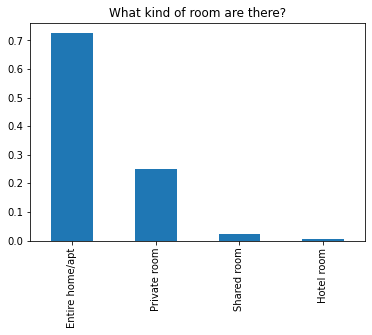

In [22]:
#We can use the library to visualize the data 

def most_listed_type_room():
    """ Plots a bar graphic of the most listed types of room in Rio de Janeiro
    Parameters:
    Return:
        most_listed: a bar graphic of the most listed types of rooms
    """
    room_type_vals = df_listings.room_type.value_counts()
    most_listed = (room_type_vals/df_listings.shape[0]).plot(kind="bar");
    
    return most_listed

most_listed_type_room();plt.title("What kind of room are there?");



Since there were a lot of neighbourhoods listed in Rio de Janeiro, lets find out the 10 most listed ones:

3) What was the 10 most listed neighbourhoods in Rio de Janeiro?

Text(0.5, 1.0, 'Neighbourhoods')

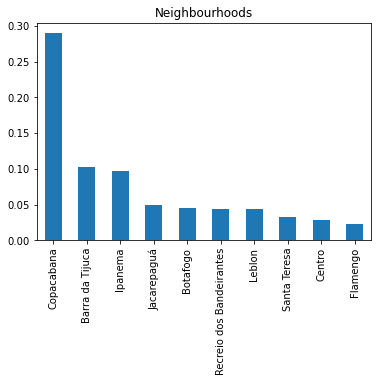

In [19]:
def most_listed_neighbourhoods():
    """ Plots a bar graphic of the most listed neighbourhoods
    Parameters:
    Return:
        most_listed_graphic: a bar graphic of the most listed neighbourhoods
    """
#If we dont use [:10] the graphic wont look good because of the great amount of neighbourhoods
# Using the [:10] parameter we are cleaning the data 
    neighbourhood_vals = df_listings.neighbourhood.value_counts()
    most_listed_graphic = (neighbourhood_vals[:10]/df_listings.shape[0]).plot(kind="bar")
    return most_listed_graphic   
    
most_listed_neighbourhoods();plt.title("Neighbourhoods")

To answer the total number of listings during the Carnival holidays we have to filter the listings of the days 15 and 16 of February using the calendar dataframe. But, since we don't have the information of this period, we will consider the days 22 and 23 of February.

Let's have a look in the data.





In [20]:
# First, we have to make sure that the date column is the correct type. 
# Currently, this column is the object type. 


df_calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9685126 entries, 0 to 9685125
Data columns (total 7 columns):
 #   Column          Dtype  
---  ------          -----  
 0   listing_id      int64  
 1   date            object 
 2   available       object 
 3   price           object 
 4   adjusted_price  object 
 5   minimum_nights  float64
 6   maximum_nights  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 517.2+ MB


In [21]:
# Analysing Data
df_calendar["date"] = pd.to_datetime(df_calendar["date"])

start_date = '2021-02-22'
end_date = '2021-02-23'

# this function creates a mask to filter the dataset by dates
def mask_by_date (start, end):
    """ Creates a mask to be used to filter by a start date and a end date
    Parameters:
        start (date): The start date to be used in the mask 
        end (date): The end date to be used in the mask 
    Return:
        mask_by_date: a mask that to be used to filter a dataset by dates
    """
    mask_by_date = (df_calendar['date'] >= start) & (df_calendar['date'] <= end)
    return mask_by_date 

# store the carnival listings in df_carnival_listings 

df_carnival_listings = df_calendar.loc[mask_by_date(start_date, end_date)]
df_carnival_listings 


,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,45766287,2021-02-23,f,$150.00,$150.00,2.0,1125.0
366,45765451,2021-02-23,f,$200.00,$200.00,1.0,1125.0
1702,46820926,2021-02-23,f,"$3,000.00","$3,000.00",1.0,28.0
2551,47324862,2021-02-23,f,$200.00,$200.00,2.0,1125.0
3008,47979810,2021-02-23,f,$220.00,$220.00,4.0,1125.0
...,...,...,...,...,...,...,...
9682569,48229823,2021-02-23,f,$180.00,$180.00,NaN,NaN
9682936,48229978,2021-02-23,f,$867.00,$867.00,2.0,90.0
9683666,48230564,2021-02-23,f,$722.00,$722.00,2.0,90.0
9684396,48230827,2021-02-23,f,$432.00,$432.00,2.0,90.0


The preview dataframe had 13354 rows, which means that there was a total of 13354 listings in the Carnival Hollidays.

4) What was the the total listings during the Carnival holidays in 2021 in Rio de Janeiro?

R: 13354

In the next cells, we'll treat the data to  find out what was the average price during these days.


In [38]:
# Find out how many NaN rows are in there in the dataset

df_carnival_prices_NaN = df_carnival_listings[df_carnival_listings['price'].isnull()]
df_carnival_prices_NaN

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
4378033,20873953,2021-02-23,f,NaN,NaN,3.0,1125.0


In [23]:
# store the columns price and date in df_carnival_prices excluding the NaN rows (which is only one)
df_carnival_prices = df_carnival_listings[['price', 'date']].dropna()

# '\D' in regular expressions mean not a digit. We are treating the column price to be handled as float types
df_carnival_prices['price'] = df_carnival_prices['price'].replace('\D', '', regex=True).astype(float)


# divide prices by 100 to represent cents (or 'centavos' in Portuguese)
df_carnival_prices['price']  = df_carnival_prices['price']/100

# store the total price of the listings in carnival
total_price = sum(df_carnival_prices['price'])

#Find the average price of the listings of 22 and 23 of February

average_carnival_price = total_price/df_carnival_prices.shape[0]
average_carnival_price

766.4810903916723

Finally, the average price of a room in Rio de Janeiro, in Carnival, is approximatelly R$766,48!

5) What was the average price to book a room during the period of the Carnival hollidays in Rio de Janeiro?

R$766,48!


# Evaluate the Results

In this project we answered 5 questions to help us evaluate if the website airbnb is a good alternative to book a room in Rion de Janeiro during the period of Carnival. In the previous sections we created pyhton functions to answer the following questions:
    

1) How many neighborhoods were listed in Rio de Janeiro?

R: 7712 neighbourhoods

2) What was the most listed type of room in Rio de Janeiro?

R: Entire apartment or room




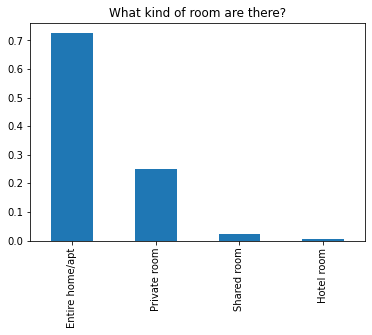

In [55]:
most_listed_type_room();plt.title("What kind of room are there?");

3) What was the 10 most listed neighbourhoods in Rio de Janeiro?

R: Copacabana, Barra da Tijuca, Ipanema, Jacarepagua, Botafogo, Recreio dos Bandeirantes, Leblon, Santa Tereza, Centro, Flamengo



Text(0.5, 1.0, 'Neighbourhoods in Rio de Janeiro')

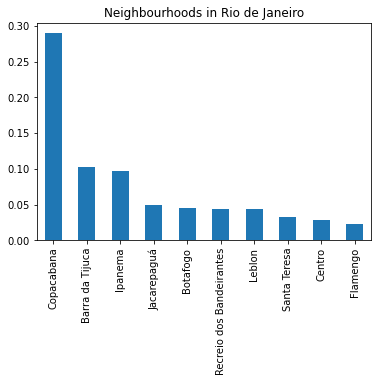

In [51]:
most_listed_neighbourhoods();plt.title("Neighbourhoods in Rio de Janeiro")

4) What was the the total listings during the Carnival holidays in 2021 in Rio de Janeiro?

R: 13354

5) What was the average price to book a room during the period of the Carnival hollidays in Rio de Janeiro?

R: R$766,48

In the Preparation and Modeling section, you can see the python functions and data manipulation that were done to answer the previous questions.

We could see that there are a lot of different options of neighborhoods listed in Airbnb and we also could see that the Copacabana is, by far, the most chosen one. Also, the most listed type of room listed is the entire room or apartment. 

So, if you are looking for an entire apartment or room to book in Rio de Janeiro, the Airbnb website has some awsome options. But, if you are looking for a shared room, Airbnb may not be the best alternative for you. 

Finally, you should be prepared to pay an average price of R$766,48 to book a room in Rion de Janeiro during the Carnival Holiday.

If you are planning to stay in Rio de Janeiro to celabrate Carnival, take a look at the Airbnb website! There are a lot of good options for you to know the city! 

In [ ]:
#A web page that was very helpful in this project was: 
# https://pandas.pydata.org/docs/reference/general_functions.html